### Numerical Method for ODEs - part 2

This topic is splitted into two just because the editor for `ipynb` is slow.

Part 1

- Existence and uniqueness
- Taylor series method
- Local truncation errors and global error
- Runge-Kutta method

Part 2 

- Linear multistep methods
- Analysis of linear multistep methods
- Stiffness

#### Linear multistep methods

##### Method

Idea: we want $x'(t) \approx f(t, x(t))$
- Observation 1: (Numerical differentiation) Approximations of $x'(t)$ can be obtained by a certain linear combination of $x(t_i)$'s, where $t_i$'s are near $t$.  
- Observation 2: A certain average of multiple slopes can give a better slope for the time marching. (Averge can also be expressed by a linear combination.)
- $$``(\text{lin. comb. of history}) = h(\text{lin. comb. of slope history})"$$



> **Definition** (Linear $k$-step method)
> 
> Given the history of length $k$, $\{x_{n}, x_{n-1}, \cdots, x_{n-k+1}\}$, choose appropriate $a_i$'s and $b_i$'s, and compute $x_{n+1}$ such that  
> $$\sum^{i=1}_{-k+1} a_{i}x_{n+i} = h\sum^{i=1}_{-k+1} b_{i}f_{n+i},$$
> where $f_j:=f(t_j, x_j)$.


**Some important classes of multistep methods**

- Adams-Bashforth (AB)
  1. Choose $a$'s based on difference quotient: $a_{k+1}=1, a_{k}=-1$ and all other $a$'s are zero.
  2. Choose $b$'s based on interpolation of slopes in an explicit way: $b_{k+1}=0$.
- Adams-Moulton (AM)
  1. Choose $a$'s based on difference quotient: $a_{k+1}=1, a_{k}=-1$ and all other $a$'s are zero.
  2. Choose $b$'s based on interpolation of slopes in an implicit way: hence $b_{k+1}\neq0$.
- Backward Differentiation Formula (BDF)
  1. Choose $b$'s so that the slope terms are the extreme implicit: $b_{k+1}\neq0$ and other $b$'s are zero.
  2. Choose $a$'s based on numerical differentiation using interpolation, hence the name. 
- In theory, we can make the most out of the degrees of freedom by tuning $a$'s and $b$'s to obtain as accurate method as possible. But we will see the method of the highest possible order is not a good option.

##### Adams-Bashforth methods (AB)

- Adams-Bashforth methods are explicit multistep methods.

**Derivation**

**Idea**: use the fundemental theorem of calculus and quadrature (e.g., $k=3$)

![Interpolation for AB3](https://jhparkyb.github.io/resources/notes/na/fig_AdamsBashforthInterpolation_lp2000.png)

1. Suppose $x(t)$ solves the ODE, $x' = f(t,x)$, and integrate 

$$
x\left(t_{n+1}\right)
=x\left(t_n\right)+\int_{t_n}^{t_{n+1}} x'(t) d t
=x\left(t_n\right)+\int_{t_n}^{t_{n+1}} f(t, x(t)) d t
$$

2. Replace $f(t,x(t))$ with its polynomial interpolation $p(t)$ at $(t_{n-2}, f_{n-2}), (t_{n-1}, f_{n-1}), (t_{n}, f_{n})$, where $f_{j}:=f(t_{j}, x(t_j))$. 

3. Obtain the method by labeling $x_j\approx x(t_j)$. It should be clear that it is of the form 

$$
x_{n+1} = x_{n} + A f_{n} + B f_{n-1} + C f_{n-2},
$$

for some $A,B,C\in\mathbb{R}$.

4. By carrying out 1-3, we obtain,  

$$
x_{n+1} = x_{n} + h \left( \frac{23}{12} f_{n} - \frac{16}{12} f_{n-1} + \frac{5}{12} f_{n-2} \right).
$$

> **Example** (AB3)
>
> Verify one of the non-trivial coefficients from AB3.
>
> [derivation of AB3](https://jhparkyb.github.io/resources/notes/na/der_AdamsBashforth3_lp2000.png)


> **Error analysis** (AB3)
>
> [LTE of AB3](https://jhparkyb.github.io/resources/notes/na/pf_LTE1DAdamsBashforth3_lp2000.png)

##### Adams-Moulton methods (AM)

- Adams-Moulton methods are implicit multistep methods.

**Derivation**

**Idea**: use the fundemental theorem of calculus and quadrature (e.g., $k=3$)

![Interpolation for AB3](https://jhparkyb.github.io/resources/notes/na/fig_AdamsMoultenInterpolation_lp2000.png)

1. (same as AB) Suppose $x$ solves the ODE, $x' = f(t,x)$, and integrate 

$$
x\left(t_{n+1}\right)
=x\left(t_n\right)+\int_{t_n}^{t_{n+1}} x'(t) d t
=x\left(t_n\right)+\int_{t_n}^{t_{n+1}} f(t, x(t)) d t
$$

2. Replace $f(t,x(t))$ with its polynomial interpolation $p(t)$ at $(t_{n-2}, f_{n-2}), (t_{n-1}, f_{n-1}), (t_{n}, f_{n})$, <ins>and</ins> $(t_{n+1}, f_{n+1})$, where $f_{j}:=f(t_{j}, x(t_j))$. 

3. Obtain the method by labeling $x_j\approx x(t_j)$. It should be clear that it is of the form 

$$
x_{n+1} = x_{n} + A f_{n+1} + B f_{n} + C f_{n-1} + D f_{n-2},
$$

for some $A,B,C,D\in\mathbb{R}$.

4. By carrying out 1-3, we obtain,  

$$
x_{n+1}=x_{n}+h\left(\frac{9}{24} f_{n+1}+\frac{19}{24} f_{n}-\frac{5}{24} f_{n-1}+\frac{1}{24} f_{n-2}\right).
$$

> **Question**
>
> Guess the order of AM3.
>
> (Reminder) This is **about atmosphere**, not getting it right.
> 
> 1. Think for a short time.
> 2. Share your guess with your pair.
> 3. Type your answer in clicker.
> 4. Feel free to say out loud.

> **Question**
>
> ![Half correct LTE of AM3](https://jhparkyb.github.io/resources/notes/na/pf_HalfCorrectErrorAdamsMoulton3_lp3000.png)
>
> What do you think? Is the proof correct?
>
> (Reminder) This is **about atmosphere**, not getting it right.
> 
> 1. Think for a short time.
> 2. Share your guess with your pair.
> 3. Type your answer in clicker.
> 4. Feel free to say out loud.
> 


#### Backward Differentiation Formula (BDF2)

- BDFs are implicit methods.

##### Derivation ($k=3$)

![Interpolation for BDF](https://jhparkyb.github.io/resources/notes/na/fig_BDFInterpolation_lp2000.png)

Idea: The methods of Adams' family are based on interpolating the slope functions. Can we obtain interpolating positions, $x$'s? 

- Given $x_{n-2}, x_{n-1}, x_{n}$ at $t_{n-2}, t_{n-1}, t_{n}$ resp., pretend to know $x_{n+1}$ at $t_{n+1}$ and find a polynomial $p(t)$ interpolating the four points, hence $x(t)\approx p(t)$.
- Assume $x'(t)\approx p'(t)$, and argue $p'(t_{n+1})\approx x'(t_{n+1}) = f_{n+1}$.

> **Remark**
>
> We literally look backwards and come up with a formula for the numerical differentiation, hence the name.

**Example** (First few BDFs)
| | | 
|---|---|
| BDF1 | $x_{n+1} - x_{n} = h f_{n+1}$ |
| BDF2 | $x_{n+1} - \frac 4 3 x_{n} + \frac 1 3 x_{n-1} = \frac 2 3 h f_{n+1}$ |
| BDF3 | $x_{n+1} - \frac{18}{11} x_{n} + \frac{9}{11} x_{n-1} - \frac{2}{11} x_{n-2}= \frac{6}{11}h f_{n+1}$ |

> **Remark** 
>
> - Recall that $f_{n+1}:=f(t_{n+1}, x_{n+1})$. Therefore, every BDF is implicit.
> - BDFs are considered good options for 'stiff' problems. 

> **Example**
>
> Deriving BDF2 following the idea explained earlier is one of the homework questions.

#### Predictor-Corrector method

Idea: we can combine an explicit and an implicit and hope for some good balance. To this end, make an explicit variant of the implicit method using the result of the explicit method.

**Example** (AB4-AM3 predictor-corrector method)

-  Run the AB4 method (explicit) to *predict* $x_{n+1}$; call it $x_{n+1}^*$ to distinguish from $x_{n+1}$.

    $$
    x_{n+1}^*=x_{n}+h\left(\frac{55}{24} f_{n}-\frac{59}{24} f_{n-1}+\frac{37}{24} f_{n-2}-\frac{9}{24} f_{n-3} \right)
    $$

-  Run the AM3 method (variant) using the predicted value on the RHS in $f_{n+1}$: that is, $f(t_{n+1}, x_{n+1}^*)$ instead of $f(t_{n+1}, x_{n+1})$ to *correct* the prediction.

    $$
    x_{n+1} =x_{n}+h\left(\frac{9}{24} f\left(t_{n+1}, x_{n+1}^*\right) 
    +\frac{19}{24} f_{n}-\frac{5}{24} f_{n-1}+\frac{1}{24} f_{n-2} \right)
    $$

> **Question**
>
> Why not AB3-AM4 predictor-corrector?
>
> (Reminder) This is **about atmosphere**, not getting it right.
> 
> 1. Think for a short time.
> 2. Share your guess with your pair.
> 3. Type your answer in clicker.
> 4. Feel free to say out loud.

#### Analysis of Linear Multistep methods

> **Definition** (Characteristic polynomials)
> 
> The first and second characteristic polynomials associated with a $k$--step method $
> \sum_{i=0}^{k} a_{i}x_i = h\sum_{i=0}^{k} b_{i}f_i$ is given by 
> 
> $$
> p(z) = \sum_{i=0}^{k} a_{i}z^{i},
> $$
> 
> and 
> 
> $$
> q(z) = \sum_{i=0}^{k} b_{i}z^{i},
> $$
> 
> respectively.


> **Remark** (Notation)
> 
> - The general version of linear multistep method reads: given $x_{n-k+1}, x_{n-k+2}, \cdots, x_n$, find $x_{n+1}$.
>   
>   $$\sum^{i=1}_{-k+1} a_{i}x_{n+i} = h\sum^{i=1}_{-k+1} b_{i}f_{n+i},$$
> 
> - For notational convenience, we sometimes translate the linear multistep methods to time grid $\{0, h, 2h, \cdots, k-1, k\}$ rather than $\{t_{n-k+1}, t_{n-k+2}, \cdots, t_n, t_{n+1}\}$. 
> - In this setting, each method reads: given $x_{0}, x_{1}, \cdots, x_{k-1}$, find $x_{k}$.
> - This is just a notational, not essential issue.

> **Question**
>
> Find characteristic polynomials of BDF2:
> 
> $$
> x_{n+1} - \frac 4 3 x_{n} + \frac 1 3 x_{n-1} = \frac 2 3 h f_{n+1}
> $$



##### Consistency of linear multistep methods

> **Theorem** (Order condition of multistep methods)
> 
> The following are equivalent:
> 
> - The LTE of linear multistep method $\sum_{i=0}^{k} a_{i}x_i = h\sum_{i=0}^{k} b_{i}f_i$ is of order $m+1$. That is, if the true solution is smooth enough, the local truncation error $\tau[x]$ satisfies 
> 
> $$
> \tau[x]:=\sum_{i=0}^{k} a_{i}x(t_i) - h\sum_{i=0}^{k} b_{i} x'(t_i) = \mathcal{O}(h^{m+1})
> $$
> - $d_0=d_1=\cdots=d_m=0$, where
> 
> $$ 
> \begin{aligned}
> d_0 &=\sum_{i=0}^k a_i \\
> d_1 &=\sum_{i=0}^k\left(i a_i-b_i\right) \\
> d_2 &=\sum_{i=0}^k\left(\frac{i^2}{2}  a_i-i b_i\right) \\
> & \vdots \\
> d_j &=\sum_{i=0}^k\left(\frac{i^j}{j !} a_i-\frac{i^{j-1}}{(j-1) !} b_i\right) \quad(j \geq 1)
> \end{aligned}
> $$


> **Remark** (consistency order) 
>
> - When a multistep method satisfies $d_0=d_1=\cdots=d_m=0$ ($m \ge 1$), we say the method is *consistent (to order $m$)*. That is, it discretizes the ODE $x'=f(t,x)$ in a consistent manner: the formula approaches the ODE as $h\to 0$. This is just a different terminology of the order of LTE (often with the order omitted).
> - For the reason we can see from the previous theorem, people often say "LTE can be measured by how much the true solution fails to satisfy the method."
> - We skip the proof in favor of more computations. For a proof see, e.g., Kincaid and Cheney (2002) Numerical analysis - Mathematics of Scientific Computing (p. 553).

> **Theorem** (Consistency of multistep methods)
>
> Let $p(z)$ and $q(z)$ are the first and second characteristic polynomials of a multistep method. If 
> 
> $$
> p(1)=0 \text{ and } p'(1)=q(1),
> $$
> 
> then the method is consistent (to order $m$ with $m\ge1$).


> **Remark**
>
> - This theorem on the consistency is just a different way of expressing the order condition of $d_0=d_1=0$.

[Proof of consistency using characterisitc polynomial](https://jhparkyb.github.io/resources/notes/na/pf_ConsistencyMultistepCharPoly_lp2000.png)

> **Example**
>
> Checking consistency will be part of convergence examples. We skip separate examples to avoid repetitions.

##### Zero-stability of linear multistep methods

> **Definition** (zero-stability)
> 
> A linear $k$--step method is *zero-stable* if there is a constant $C > 0$ such that, for any $\{x_i\}$ and $\{y_i\}$ that have been generated by the same method but with different initial values $x_0, x_1,\cdots, x_{k-1}$ and $y_0, y_1,\cdots, y_{k-1}$ respectively, we have 
> 
> $$
> |x_n - y_n| \le C \max\{|x_0 - y_0|, \cdots, |x_{k-1} - y_{k-1}|\}
> $$
> 
> for all $n\le N$, where $N$ is the last time index for the final time of an IVP: $T=hN$. 


> **Remark**
>
> - In words, (zero-)stable method does not amplify the error (in the first few steps).
> - While the definition of zero-stability describes the behavior that we desire, it is not easy to check. Fortunately, there is a much simpler way to check whether a method has this property. 

> **Definition** (Root condition)
> 
> A polynomial $p(z)$ of degree $k$ is said to satisfy the *root condition* if its roots are in the closed unit circle $\{z \in \mathbb{C} \; : \; |z|\le 1\}$ and any roots of modulus 1 is simple.

> **Theorem** (Root condition checks zero-stability)
>
> A linear $k$-step method is zero-stable if and only if its first characteristic polynomial satisfies the root condition.

![Unit circle](https://www.math.uvic.ca/~jvbutter/PreCalcReview/generated/latex-image/image-110.svg)

Figure: Jane Butterfield, Gary MacGillivray

> **Remark**
>
> - Many textbooks define (zero-)stability using the root condition while many others take the same approach as these notes. 
> - The definition of zero-stability chosen in these notes shows more vividly the behavior of numerical methods while the root condition makes it easier to check.
> - Some authors (e.g., Sauer) also further distinguish *strongly stable* and *weakly stable* methods: 
>   - If the only root of the first characteristic polynomial with modulus 1 is 1, it is called *strongly stable*. 
>   - Otherwise, we say the method is *weakly stable*.

> **Example**
>
> Checking zero-stability will be part of convergence examples. We skip separate examples to avoid repetitions.

##### Convergence of linear multistep methods

> **Defintion**
> 
> A $k$--step method is said to be *convergent* if 
> 
> $$
> \max_{0\le i\le N}\{|x_i-x(t_i)|\}\to 0 \text{ as } h \to 0
> $$
> whenever the initial values satisfy $\max_{0\le i\le k-1}\{|x_i-x(t_i)|\}\to 0$  as $h \to 0$.

> **Remark**
>
> - In words, "numerical solution must be close to the true one as a (discrete) <ins>trajectory</ins>," not only the final position.
> - This definition is fair because, if initial values are inaccurate, there is no way for a method to give accurate trajectory.
> - The conditions on the starting values strike a great balance of practicality and theoretical value. 
>   - It bears theoretical merit because it guarantees convergence as we would want (i.e., convergence as trajectory). 
>   - It is practical because, even though it looks complicated, we can use Runge-Kutta method for the first $k-1$ steps to satisfy those conditions.

> **Theorem** (Dahlquist equivalence theorem)
>
> A multistep method is convergent if and only if it is stable and consistent. 

We do not present a proof of this theorem.

> **Example**
>
> Show the explicit Euler is convergent. 
>
> $$ x_{n+1} = x_n + h f(t_n, x_n)$$

[Example: convergence of explicit Euler method](https://jhparkyb.github.io/resources/notes/na/ex_ConvergenceExplicitEuler_lp2000.png)

> **Example**
>
> Show the AM2 is convergent.  
>
> $$x_{n+1}=x_{n}+h\left(\frac{5}{12} f_{n+1}+\frac{8}{12} f_{n}-\frac{1}{12} f_{n-1}\right)$$

[Example: convergence of AM2](https://jhparkyb.github.io/resources/notes/na/ex_ConvergenceAM2_lp2000.png)

> **Remark**
>
> While we have a nice result as above, we also have some pessimistic results.

> **Theorem** (Dahlquist first barrier; barrier on consistency)
> 
> The order of a (zero-)stable linear k-step method cannot exceed $k + 1$ if k is odd, and cannot exceed $k + 2$ if k is even. In particular, if the method is explicit, then it cannot exceed $k$.

We do not present a proof of this theorem.

#### Numerical methods for stiff ODEs

##### Stiffness

- There is no clear definition for this. Rather, it is a phenomenon. [^1]
    ![Lambert's opinion on stiffness](https://jhparkyb.github.io/resources/images/na/na_StiffnessLambert.png)
- The following descriptions show some aspects of stiffness, though none of them gives a perfect one. 
  - *Stiffness occurs when stability requirements, rather than those of accuracy, constrain the step length*. [^1]
  - *Stiffness occurs when some components of the solution decay much more rapidly than others.* (in multi-dimensional settings)[^1]
  - *Stiffness arises when attracting solutions are surrounded with fast-changing nearby solutions. This is often a sign of multiple timescales in the system* (namely, the system undergoes rapid changes at some times while it does not change much for periods of other times.)[^2]



[^1]: J. D. Lambert (1991) *Numerical Methods for Ordinary Differential Systems - The Initial Value Problem*. (pp. 216-224)

[^2]: Timothy Sauer (2017) *Numerical Analysis* 3rd Edition. (p. 348)



> **Example** (Stiff ODE)
>
> 1. The following IVP has a unique solution $x(t) = (x_0 - b)e^{a t} +b$: $$\begin{cases} \dot x = a(x-b) \\ x(0)=x_0. \end{cases}$$
> 2. The Explicit Euler method is known to be convergent: it is consistent and zero-stable.
> 3. However, the following example shows that the explicit Euler method needs small step size for a different reason than accuracy.  

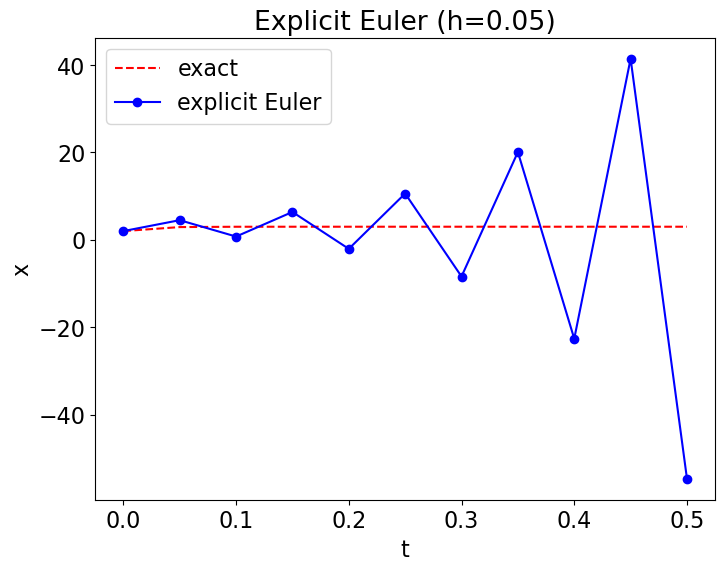

In [5]:
"""This example shows stiffness in the numerical solution of an ODE.
- vary the following parameters for a good illustration of stiffness:
  h = 0.001, 0.01, 0.05
  a = -50.,
"""
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

# experiemental parameters
h = 0.05
a = -50.

# numerical settings
N = 10
T = h*N
tt = np.arange(0., T+0.5*h, h)

# IVP settings
f = lambda t, x: a*(x - b)
x0 = 2.
b = 3.

# exact solution
x_exact = (x0 - b)*np.exp(a*tt) + b

# numerical solution: explicit Euler
xx = np.zeros(N+1)
xx[0] = x0
for i in range(N):
    xx[i+1] = xx[i] + h*f(tt[i], xx[i])

# plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(tt, x_exact,'r--' , label='exact')
ax.plot(tt, xx, 'bo-', label='explicit Euler')
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title(f'Explicit Euler (h={h:g})')
plt.show()

##### Summary

- There is another stability issue, different from zero-stability, related to *stiffness*.
- Stiffness leads to a concept *A-stability* or *linear stability*. However, we do not pursue this in this course. Just be aware of this issue.
- Stiffness forces small step sizes, making many methods less useful.
- Generally speaking, explicit methods are unfavorable for stiff problems while implicit methods work better. Implicit Euler method and BDF2 is among the most robust method in this regard.
- Dahlquist second barrier tells us the limited options for stiff problems.

> **Theorem** (Dahlquist second barrier)
>
> No explicit linear multistep methods are A-stable (i.e., inadequate for stiff ODEs). Furthermore, the maximal order of an (implicit) A-stable linear multistep method is 2.

We do not present a proof of this theorem.

##### Analysis


Explicit calculations with a simple example show the issue vividly.

> **Example** (stiffness)
>
> Consider an IVP
> $$
> \begin{cases}\dot x = -50 x \\ x(0) = 1, \end{cases}
> $$
> 
> whose true solution is $x(t) = e^{-50t}$.
>
> ![Slope field of stiff equation](https://jhparkyb.github.io/resources/notes/na/fig_StiffEqnDirectionField_lp2000.png)
> 
> [Stiffness in a simple 1D example with explicit Euler](https://jhparkyb.github.io/resources/notes/na/ex_StiffODE1DExplicitEuler_lp2000.png)
>
> [Stiffness resolved by implicit Euler in a simple 1D example](https://jhparkyb.github.io/resources/notes/na/ex_StiffODE1DImplicitEuler_lp2000.png)

---
This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)